In [1]:
import pooch


url = f"https://github.com/LaPoGeoMar/geoquimica_marinha/releases/download"
version = "v0.0.1.dev"
fname = "erdMH1chlamday.nc"

fname = pooch.retrieve(
    url=f"{url}/{version}/{fname}",
    known_hash="sha256:4f6e5e2d8500d3ea4ce8e2282df40ff7577ff10e5a33e88a22e5b5bdab03c07c",
)

In [2]:
import xarray as xr


ds = xr.open_dataset(fname)
ds

<xarray.Dataset>
Dimensions:      (time: 12, latitude: 4320, longitude: 8640)
Coordinates:
  * time         (time) datetime64[ns] 2021-01-16 2021-02-16 ... 2021-12-16
  * latitude     (latitude) float32 89.98 89.94 89.9 ... -89.9 -89.94 -89.98
  * longitude    (longitude) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Data variables:
    chlorophyll  (time, latitude, longitude) float32 ...
Attributes: (12/51)
    _lastModified:                     2022-06-18T05:03:50.000Z
    cdm_data_type:                     Grid
    Conventions:                       CF-1.6, COARDS, ACDD-1.3
    creator_email:                     data@oceancolor.gsfc.nasa.gov
    creator_name:                      NASA/GSFC/OBPG
    creator_type:                      group
    ...                                ...
    temporal_range:                    month
    testOutOfDate:                     now-90days
    time_coverage_end:                 2021-12-16T00:00:00Z
    time_coverage_start:               2021-01-16T00:00:00Z
    title:                             Chlorophyll-a, Aqua MODIS, NPP, L3SMI,...
    Westernmost_Easting:               -179.97917

In [3]:
ds.attrs

{'_lastModified': '2022-06-18T05:03:50.000Z',
 'cdm_data_type': 'Grid',
 'Conventions': 'CF-1.6, COARDS, ACDD-1.3',
 'creator_email': 'data@oceancolor.gsfc.nasa.gov',
 'creator_name': 'NASA/GSFC/OBPG',
 'creator_type': 'group',
 'creator_url': 'https://oceandata.sci.gsfc.nasa.gov',
 'date_created': '2022-06-18T05:03:50.000Z',
 'Easternmost_Easting': 179.97917,
 'geospatial_lat_max': 89.979164,
 'geospatial_lat_min': -89.97917,
 'geospatial_lat_resolution': 0.04166666589488307,
 'geospatial_lat_units': 'degrees_north',
 'geospatial_lon_max': 179.97917,
 'geospatial_lon_min': -179.97917,
 'geospatial_lon_resolution': 0.041666674383609215,
 'geospatial_lon_units': 'degrees_east',
 'history': 'Files downloaded daily from https://oceandata.sci.gsfc.nasa.gov/MODIS-Aqua/L3SMI to NOAA SWFSC ERD (erd.data@noaa.gov)\nERDDAP adds the time dimension.\nDirect read of HDF4 file through CDM library\n2023-02-15T21:16:54Z (local files)\n2023-02-15T21:16:54Z http://coastwatch.pfeg.noaa.gov/erddap/gridda

In [4]:
ds["chlorophyll"].attrs

{'colorBarMaximum': 30.0,
 'colorBarMinimum': 0.03,
 'colorBarScale': 'Log',
 'ioos_category': 'Ocean Color',
 'long_name': 'Mean Chlorophyll a Concentration',
 'references': 'Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a algorithms for oligotrophic oceans: A novel approach based on three-band reflectance difference, J. Geophys. Res., 117, C01011, doi:10.1029/2011JC007395.',
 'standard_name': 'concentration_of_chlorophyll_in_sea_water',
 'units': 'mg m-3',
 'valid_max': 100.0,
 'valid_min': 0.001}

In [5]:
import numpy as np


chl_log = np.log(
    ds.mean(dim="time")
)

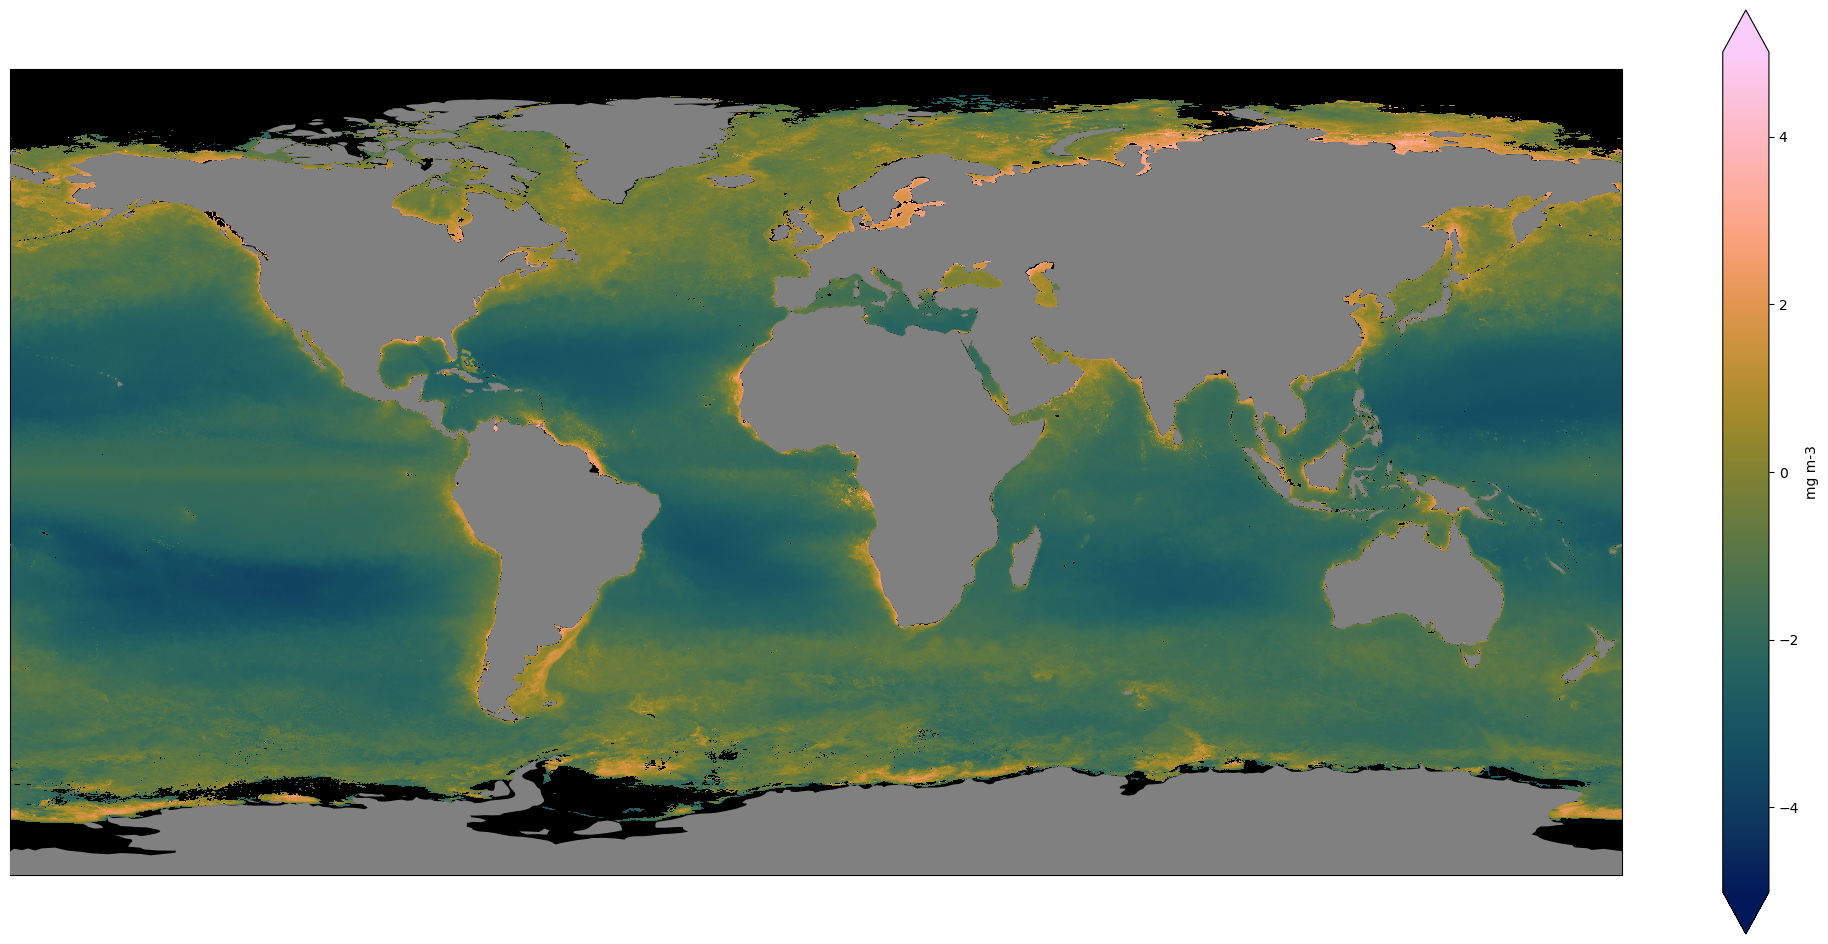

In [6]:
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc

import cartopy.crs as ccrs
from cartopy.feature import LAND


cmap = cmc.batlow
cmap.set_bad("black", 1.)

fig, ax = plt.subplots(
    subplot_kw={"projection": ccrs.PlateCarree()},
    figsize=(26, 12),
)

cs = chl_log["chlorophyll"].plot(
    ax=ax,
    x="longitude",
    y="latitude",
    cmap=cmap,
    cbar_kwargs={
        "label": f"{ds['chlorophyll'].attrs['units']}",
        "extend": "both",
    },
)

ax.add_feature(LAND, facecolor="gray", zorder=99);